In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tqdm
from hebbian_learning import *

c:\Users\Elbert\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question 1 - Pattern Formation by Hebbian Learning

### Exercise 1 - Hebbian Learning on Correlated Signals

(2, 100000)
(2, 2)
[1.78615874 0.200649  ]


C:\Users\Elbert\AppData\Local\Temp\ipykernel_23328\3576353077.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


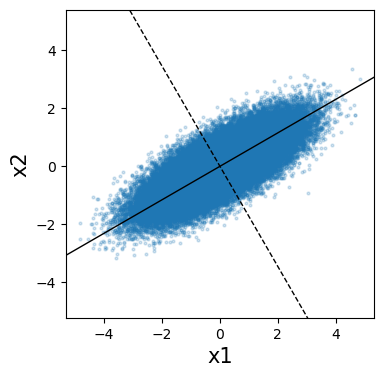

In [13]:
# (a) Building correlated inputs matrix
T = 100_000 # t=0,...,100,000
X = corr_input(T=T) # correlated inputs, xt
print(X.shape)

# (b) Covariance matrix of input matrix X
C = X @ X.T / T # time-averaged covariance matrix of inputs
print(C.shape)
eValues, eVectors = np.linalg.eig(C)
print(eValues)

fig, ax = plt.subplots(1, figsize=[6,4])
scatter(X, eVectors[:,0], ax)
ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('x2', fontsize=15)
# ax.grid(zorder=0)
fig.show()

#### Learn W function

In [3]:
def learnW(X, eta, K, N=30):
    # (c) Function to simulate Hebbian learning in the feedforward synaptic weights
    T = X.shape[1]
    T1 = T // 200

    # i)
    W = np.random.randn(N, 2)
    W = normalize_W(W)

    WStore = np.zeros((T1,N,2))
    for t in range(T):
        Xt = X[:,t:t+1]
        # ii)
        u = W @ Xt
        y = K @ u
        # iii)
        W += eta * y @ Xt.T
        W = normalize_W(W)
        # iv)
        if t%200 == 0:
            WStore[t//200,:,:] = W
    
    return WStore

# (d) Running learnW for signals X with learning rate eta=1e-4
N = 100
K = np.diag(np.ones(N))
WStore1 = learnW(X, 1e-4, K, N) # (T1,N,2)

C:\Users\Elbert\AppData\Local\Temp\ipykernel_23328\2711174865.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


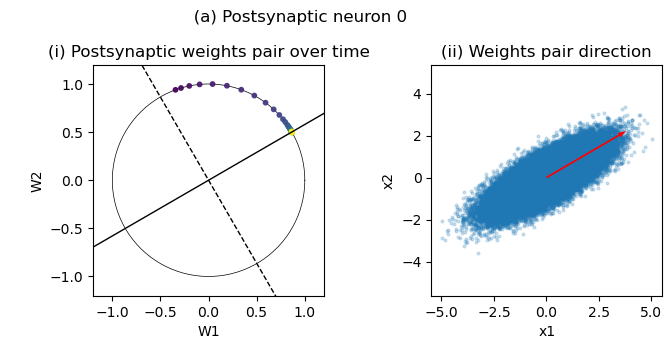

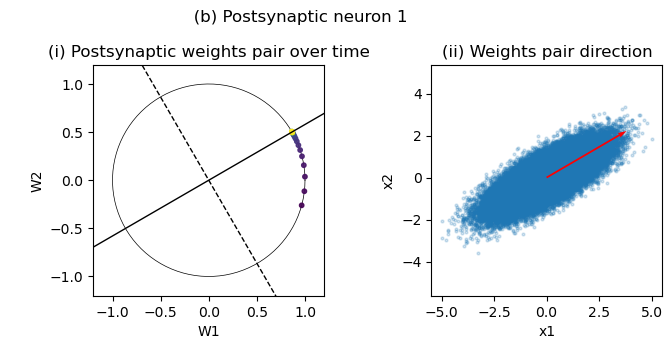

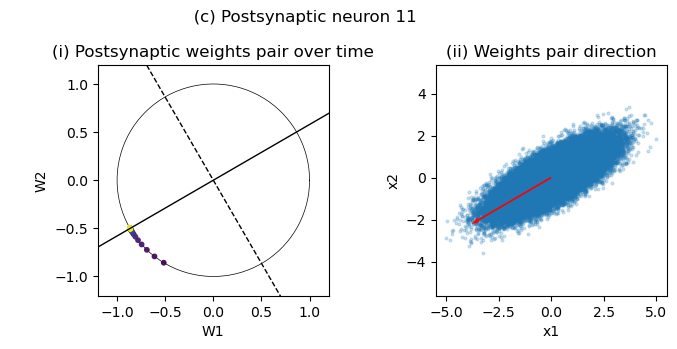

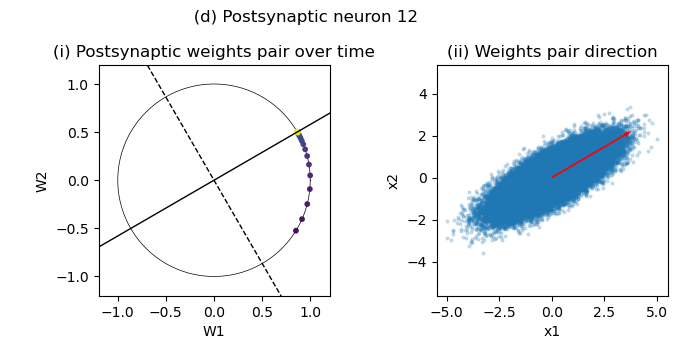

In [4]:
postSynNeurons = [0,1,11,12]
alphabet = ['a','b','c','d','e','f','g','h','i']
for i, neuron in enumerate(postSynNeurons):
    fig, axs = plot_results(X, WStore1[:,neuron,:], eVectors[:,0], skip_step=10)
    axs[0].set_title(f"                                   ({alphabet[i]}) Postsynaptic neuron {neuron}\n\n(i) Postsynaptic weights pair over time")
    axs[0].set_xlabel('W1')
    axs[0].set_ylabel('W2')
    axs[1].set_title(f"(ii) Weights pair direction")
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    fig.show()

### Exercise 2 - Map Formation in a Two-Layer Network

(100, 100)


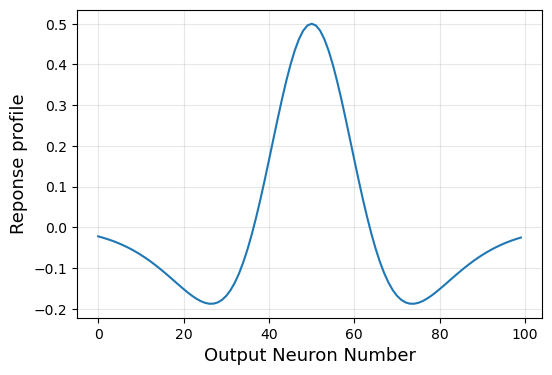

In [16]:
# (a)
K = make_K(N)
print(K.shape)
plt.figure(figsize=[6,4])
plt.plot(K[:,int(N/2)])
plt.xlabel('Output Neuron Number', fontsize=13)
plt.ylabel(f'Reponse profile', fontsize=13)
plt.grid(alpha=0.3)
plt.show()

In [18]:
# (b) Running learnW with a non-identity K matrix
WStore2 = learnW(X, 1e-4, K, N) # (T1,N,2)

C:\Users\Elbert\AppData\Local\Temp\ipykernel_23328\1027120801.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


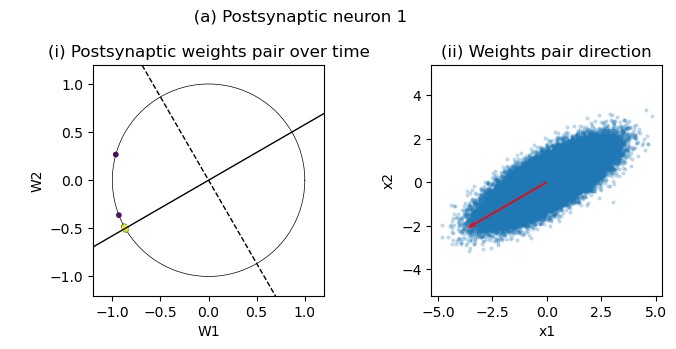

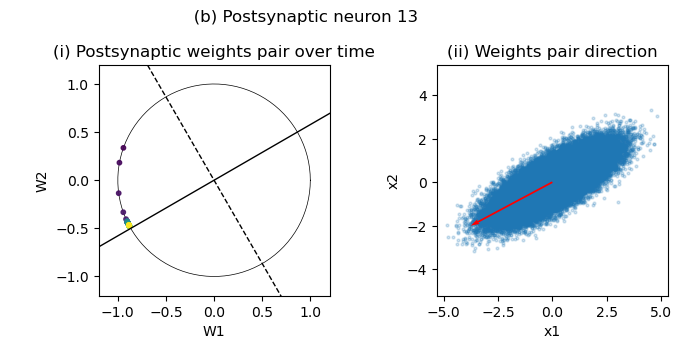

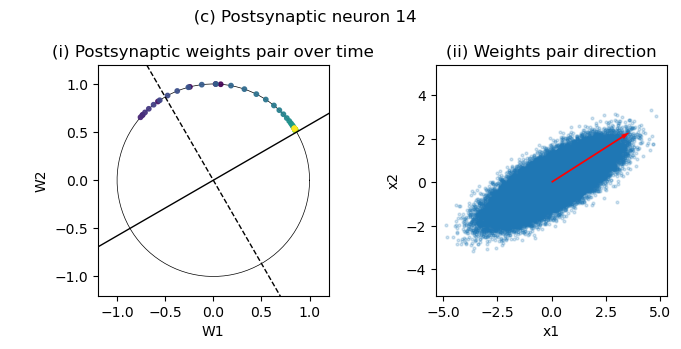

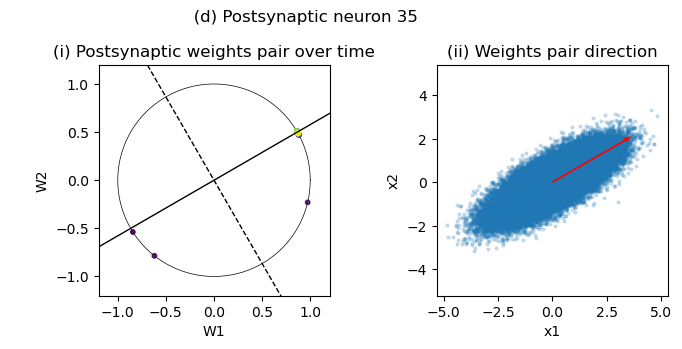

In [41]:
postSynNeurons = [1,13,14,35]
for i, neuron in enumerate(postSynNeurons):
    fig, axs = plot_results(X, WStore2[:,neuron,:], eVectors[:,0], skip_step=10)
    axs[0].set_title(f"                                   ({alphabet[i]}) Postsynaptic neuron {neuron}\n\n(i) Postsynaptic weights pair over time")
    axs[0].set_xlabel('W1')
    axs[0].set_ylabel('W2')
    axs[1].set_title(f"(ii) Weights pair direction")
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    fig.show()

In [69]:
sStore1 = np.zeros((WStore1.shape[0], WStore1.shape[1]))
sStore2 = np.zeros((WStore2.shape[0], WStore2.shape[1]))

for t in range(WStore1.shape[0]):
    sStore1[t,:] = WStore1[t,:,:] @ eVectors[:,0]
    sStore2[t,:] = WStore2[t,:,:] @ eVectors[:,0]

C:\Users\Elbert\AppData\Local\Temp\ipykernel_23328\3126988495.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad=1.5)


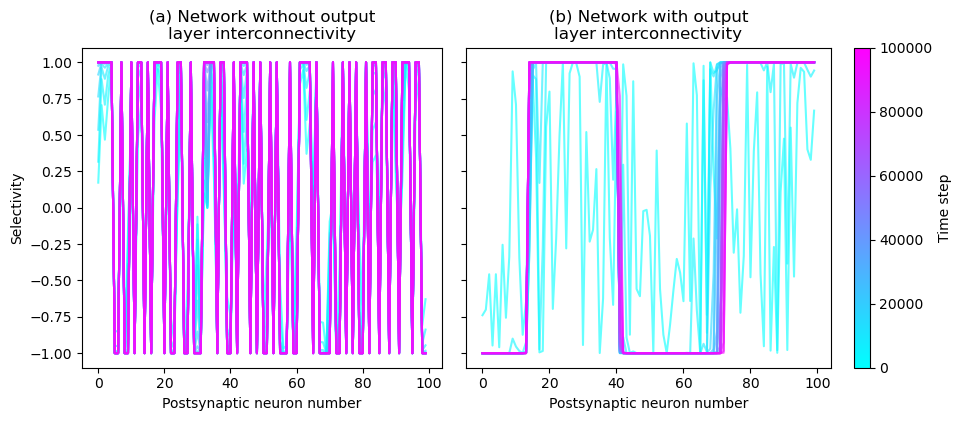

In [81]:
# (c)
fig = plt.figure(figsize=[12,4])
ax = [plt.axes([0.1, 0.1, 0.3, 0.8]), plt.axes([0.42, 0.1, 0.38, 0.8])]
timesteps2Plot = np.arange(0,WStore1.shape[0],20)

for i, timestep in enumerate(timesteps2Plot):
    ax[0].plot(sStore1[timestep,:], c=plt.cm.cool(i/len(timesteps2Plot)), alpha=0.6)
    ax[1].plot(sStore2[timestep,:], c=plt.cm.cool(i/len(timesteps2Plot)), alpha=0.6)
for axis in ax:
    axis.set_ylim(-1.1, 1.1)
    axis.set_xlabel('Postsynaptic neuron number')
ax[0].set_ylabel('Selectivity')
ax[1].set_yticklabels([])
ax[0].set_title('(a) Network without output\nlayer interconnectivity')
ax[1].set_title('(b) Network with output\nlayer interconnectivity')
fig.colorbar(plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(0, (timesteps2Plot[-1]+20)*200)), label='Time step')
fig.tight_layout(w_pad=1.5)

plt.show()

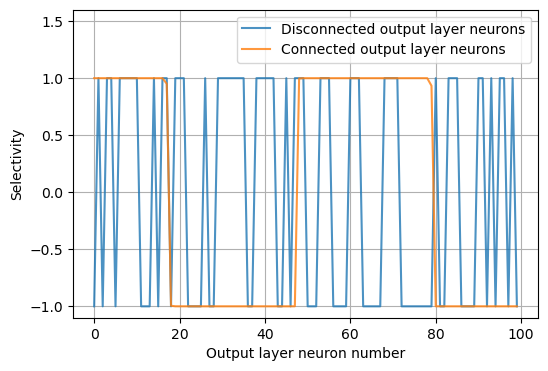

In [17]:
plt.figure(figsize=[6,4])
plt.plot(s1, alpha=0.8, label='Disconnected output layer neurons')
plt.plot(s2, alpha=0.8, label='Connected output layer neurons')

plt.ylim(-1.1, 1.6)
plt.xlabel('Output layer neuron number')
plt.ylabel('Selectivity')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [ ]:
C = np.array